## Movielens data

We are making a user-item matrix from the Movielens data.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


As we can see, the two files share an identifier variable, *movieId*. Remember that you can join two dataframes using the Pandas `merge` function.

In [5]:
df = pd.merge(movies, ratings)
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


The `timestamp` is in seconds since Jan 1, 1970 (this is a certain standard), that's why it looks weird. Let's create a user-item matrix by using a pivot table. 

In [10]:
#We are creating a pivot table (summary of data)
#index='userId' means the rows gets the userIds as row names
#columns='title' means the columns get the movie titles as column names 
#values='rating' means the number in the table will be the means of all user ratings for a certain movie.
#Since there is only one rating per movie, this gets us what we want: a matrix of user by item ratings. 
user_ratings = pd.pivot_table(df, index='userId', columns='title', values='rating')
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the matrix consists of NaN: the matrix is _sparse_. This makes sense as most people will have rated only a fraction of all the 9719 movies. Let's plot the ratings of _Pulp Fiction (1994)_:

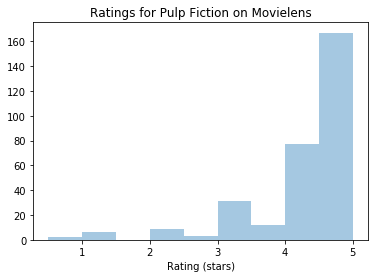

In [15]:
pulp = user_ratings['Pulp Fiction (1994)'].dropna() #we need to drop the NA's
sns.distplot(pulp, kde=False, bins=9) #We don't want a KDE, as it makes no sense. Bins set manually to get a nice graph
plt.title('Ratings for Pulp Fiction on Movielens')
plt.xlabel('Rating (stars)')
plt.show()
